# Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place your ID ("numero di matricola") that will be used as seed for random generator. You can try to change the seed to see the impact of the randomization.

In [3]:
ID = 1205687
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
# rescale the data
X = X / 255.0

Now split into training and test. Make sure that each label is present at least 10 times
in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [58 50 55 51 52 37 54 46 51 46]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


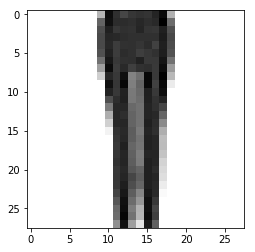

LABEL: 1
INPUT:


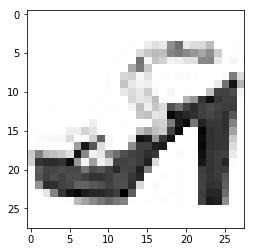

LABEL: 5
INPUT:


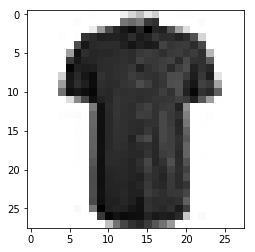

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a Feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using the GridSearchCV with cv=5.


In [8]:
parameters = {'hidden_layer_sizes': [(10,), (50,), (100,), (10,10,), (50,50,)]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#ADD YOUR CODE
grid_search_CV = GridSearchCV(mlp, parameters, cv=5, n_jobs=-1,verbose=1,return_train_score=True)
grid_search_CV.fit(X_train,y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(grid_search_CV.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(grid_search_CV.best_score_)

print("\nAll scores on the grid:")
#ADD YOUR CODE
pd.DataFrame(grid_search_CV.cv_results_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   14.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (100,)}
Score with best parameters:
0.634

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.774927,0.937933,0.005186,0.007888,"(10,)","{'hidden_layer_sizes': (10,)}",0.752381,0.732673,0.242424,0.102041,...,0.474,0.260498,3,0.944304,0.994987,0.289277,0.104478,0.454094,0.557428,0.354649
1,1.296932,0.919398,0.002193,0.000399,"(50,)","{'hidden_layer_sizes': (50,)}",0.780952,0.782178,0.343434,0.551020,...,0.612,0.164225,2,1.000000,1.000000,0.381546,0.604478,0.588089,0.714823,0.245749
2,2.161416,1.538818,0.005386,0.004909,"(100,)","{'hidden_layer_sizes': (100,)}",0.790476,0.752475,0.545455,0.469388,...,0.634,0.122853,1,1.000000,1.000000,0.496259,0.519900,0.610422,0.725316,0.227493
3,0.845138,0.829386,0.001597,0.000488,"(10, 10)","{'hidden_layer_sizes': (10, 10)}",0.733333,0.752475,0.101010,0.102041,...,0.430,0.287822,5,0.812658,0.992481,0.104738,0.101990,0.439206,0.490215,0.362810
4,1.125188,0.639299,0.001795,0.000398,"(50, 50)","{'hidden_layer_sizes': (50, 50)}",0.780952,0.732673,0.111111,0.326531,...,0.474,0.254856,3,1.000000,1.000000,0.109726,0.355721,0.406948,0.574479,0.361678


### QUESTION 1

What do you observe for different architectures and their scores? How the nummber of layers and their sizes affect the performances?

**Answer:** It seems that the size of the layers affects the performance the most. In fact, there is an improvement only by increasing the 1st hidden layer size from (10,) up to (100,), and since (50,) still performs just slightly worse than (100,) maybe it is not necessary to increase the size any further. On the other hand, by adding one extra layer, as in (10,10,) and (50,50,), there is not a relevant improvement on the score, regardless of its size, and the results are similar to the simplest architecture (10,).

### TO DO 2

Now get training and test error for a NN with best parameters from above. Use verbose=True
in input so to see how loss changes in iterations

In [9]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
best_NN = grid_search_CV.best_estimator_
best_NN.fit(X_train,y_train)

training_error = 1. - best_NN.score(X_train,y_train) #ADD YOUR CODE
test_error     = 1. - best_NN.score(X_test,y_test)#ADD YOUR CODE

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.211866


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [10]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 971,  947, 1001, 1024,  995, 1010,  986, 1048, 1018, 1000],
       dtype=int64))

## TO DO 3

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [11]:
#for NN we try the same architectures as before
parameters = {'hidden_layer_sizes': [(10,), (50,), (100,), (10,10,), (50,50,)]}

mlp_large = MLPClassifier(max_iter=100, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1, verbose=True)

mlp_large_CV = GridSearchCV(mlp_large, parameters, cv=5, n_jobs=-1,verbose=2,return_train_score=True)
mlp_large_CV.fit(X_train,y_train)

#ADD YOUR CODE

print ('\nRESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_large_CV.best_params_)

print("Score with best parameters:")
print(mlp_large_CV.best_score_)

print("\nAll scores on the grid:")
print(mlp_large_CV.cv_results_['mean_test_score'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.4min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 1, loss = 0.87257533
Iteration 2, loss = 0.51583343
Iteration 3, loss = 0.44735617
Iteration 4, loss = 0.41506469
Iteration 5, loss = 0.37855081
Iteration 6, loss = 0.35864969
Iteration 7, loss = 0.34364252
Iteration 8, loss = 0.33609083
Iteration 9, loss = 0.32117758
Iteration 10, loss = 0.30937654
Iteration 11, loss = 0.29808127
Iteration 12, loss = 0.28665574
Iteration 13, loss = 0.26738932
Iteration 14, loss = 0.27436230
Iteration 15, loss = 0.25742648
Iteration 16, loss = 0.24680732
Iteration 17, loss = 0.23518012
Iteration 18, loss = 0.23648219
Iteration 19, loss = 0.22212830
Iteration 20, loss = 0.21038004
Iteration 21, loss = 0.21287999
Iteration 22, loss = 0.20313975
Iteration 23, loss = 0.20193961
Iteration 24, loss = 0.19388297
Iteration 25, loss = 0.19111305
Iteration 26, loss = 0.18873219
Iteration 27, loss = 0.17693679
Iteration 28, loss = 0.16521010
Iteration 29, loss = 0.17399420
Iteration 30, loss = 0.17020813
Iteration 31, loss = 0.15441192
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## QUESTION 2
Describe your architecture choices and the results you observe with respect to the layers and sizes used.

**Answer:** I choose 1 or 2 hidden layers of different sizes, up to 100 neurons. Similar with the case of fewer data, the best architecture is (50,), i.e. the one with 1 layer and even not of the biggest size ( (100,) is slightly worse). Notice that again 2 hidden layers do no outperform the simplest (10,), like in the previous case.

## TO DO 4

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations. 


In [12]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
best_NN_large = mlp_large_CV.best_estimator_
best_NN_large.fit(X_train,y_train)

training_error = 1. - best_NN_large.score(X_train,y_train) #ADD YOUR CODE
test_error     = 1. - best_NN_large.score(X_test,y_test) #ADD YOUR CODE

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 0.87257533
Iteration 2, loss = 0.51583343
Iteration 3, loss = 0.44735617
Iteration 4, loss = 0.41506469
Iteration 5, loss = 0.37855081
Iteration 6, loss = 0.35864969
Iteration 7, loss = 0.34364252
Iteration 8, loss = 0.33609083
Iteration 9, loss = 0.32117758
Iteration 10, loss = 0.30937654
Iteration 11, loss = 0.29808127
Iteration 12, loss = 0.28665574
Iteration 13, loss = 0.26738932
Iteration 14, loss = 0.27436230
Iteration 15, loss = 0.25742648
Iteration 16, loss = 0.24680732
Iteration 17, loss = 0.23518012
Iteration 18, loss = 0.23648219
Iteration 19, loss = 0.22212830
Iteration 20, loss = 0.21038004
Iteration 21, loss = 0.21287999
Iteration 22, loss = 0.20313975
Iteration 23, loss = 0.20193961
Iteration 24, loss = 0.19388297
Iteration 25, loss = 0.19111305
Iteration 26, loss = 0.18873219
Iteration 27, loss = 0.17693679
Iteration 28, loss = 0.16521010
Iteration 29, loss = 0.17399420
Iteration 30, loss = 0.17020813
Iteration 31, loss = 0.15441192
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RESULTS FOR BEST NN

Best NN training error: 0.002800
Best NN test error: 0.148780


## QUESTION 3

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

**Answer:** As I expected, the test error decreases with more training data and the training error is still close to zero. The architectures are similar, both made of 1 hidden layer, but the size changes from 100 to 50. However, even if the size is twice as bigger in one case, notice from the CV model selection that they have similar performance for both training sets. 

### TO DO 5

Plot a digit that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

At index 9 of X_test, y_test is 1
Classification by NN:  2 (2 = Pullover)
Classification by large NN:  1 (1 = Trousers)
INPUT:


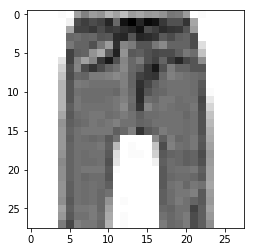

LABEL: 1


In [13]:
NN_prediction = best_NN.predict #ADD YOUR CODE
large_NN_prediction = best_NN_large.predict #ADD YOUR CODE

#ADD YOUR CODE
for i in range(X_test.shape[0]):
    # Search for the first sample that is missclassified 
    if NN_prediction(X_test[i,:].reshape(1,-1)).item() != y_test[i] and large_NN_prediction(X_test[i,:].reshape(1,-1)).item() == y_test[i]:
        print('At index',i,'of X_test, y_test is',y_test[i])
        print('Classification by NN: ', NN_prediction(X_test[i,:].reshape(1,-1)).item(),'(2 = Pullover)')
        print('Classification by large NN: ', large_NN_prediction(X_test[i,:].reshape(1,-1)).item(),'(1 = Trousers)')
        plot_input(X_test,y_test,i)  
        break

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 50000 data points. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large" , you could need to replace with your variable names.



Weights with 500 data points:


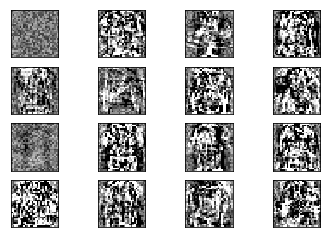

Weights with 10000 data points:


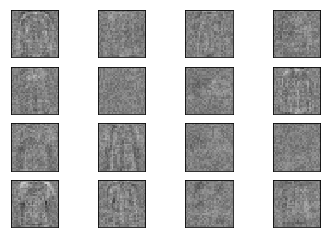

In [16]:
print("Weights with 500 data points:")

mlp = best_NN
best_mlp_large = best_NN_large

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 4

Describe what do you observe by looking at the weights

**Answer:** The plots corresponding to the bigger training set have a smoother appearance, whereas in the first case they have some sort of structure. This means that maybe not all the neurons were used and some have very large coefficients, so the learning rate could have been too high and it can be more difficult to generalize, as it is confirmed by the test errors.

### TO DO 7

Report the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores.

In [15]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# best parameters found in the SVM notebook {'C': 10, 'gamma': 0.01}
# Create the SVM and perform the fit

#ADD YOUR CODE

SVM = SVC(C=10,kernel='rbf',gamma=0.01,decision_function_shape='ovo')
SVM.fit(X_train,y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1. - SVM.score(X_train,y_train)#ADD YOUR CODE
print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1. - SVM.score(X_test,y_test)#ADD YOUR CODE
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.014399999999999968
Test score SVM:
0.13560000000000005


## QUESTION 5
Compare the results of SVM and of NN. Which one would you preferer? Which are its tradeoffs?

**Answer:** SVM and NN have similar test scores (~0.14) so there is not a clear winner. The SVM takes more time to fit and compute the scores with half of the training set size $m_{train} = 5000$ (TO DO 7) but the CV parameter grid search is more intuitive. The choice of the NN architecture is instead more heuristic and more computational power and time are required to find the best model (TO DO 3), but after that the fit and scores computation are faster (TO DO 4). In conclusion, for this specific exercise, I would choose the SVM with a rbf kernel because it requires fewer training data and it leads to a smaller test score.